In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
from kmodes.kprototypes import KPrototypes
import gower
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
import matplotlib
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import fowlkes_mallows_score
from sklearn.metrics import pairwise_distances
from sklearn.metrics import calinski_harabasz_score
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import MeanShift
from matplotlib import offsetbox
from sklearn import manifold
import sklearn
from numpy import unique
from numpy import where
from sklearn.mixture import GaussianMixture
import pycountry as pc
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
data=pd.read_csv('D:/python/data set/Country.csv')
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [3]:
#making a data frame
df=pd.DataFrame(data)
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [4]:
df.dropna(inplace=True)
df.reset_index(inplace=True,drop=True)
df.drop('country',axis=1,inplace=True)
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [5]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


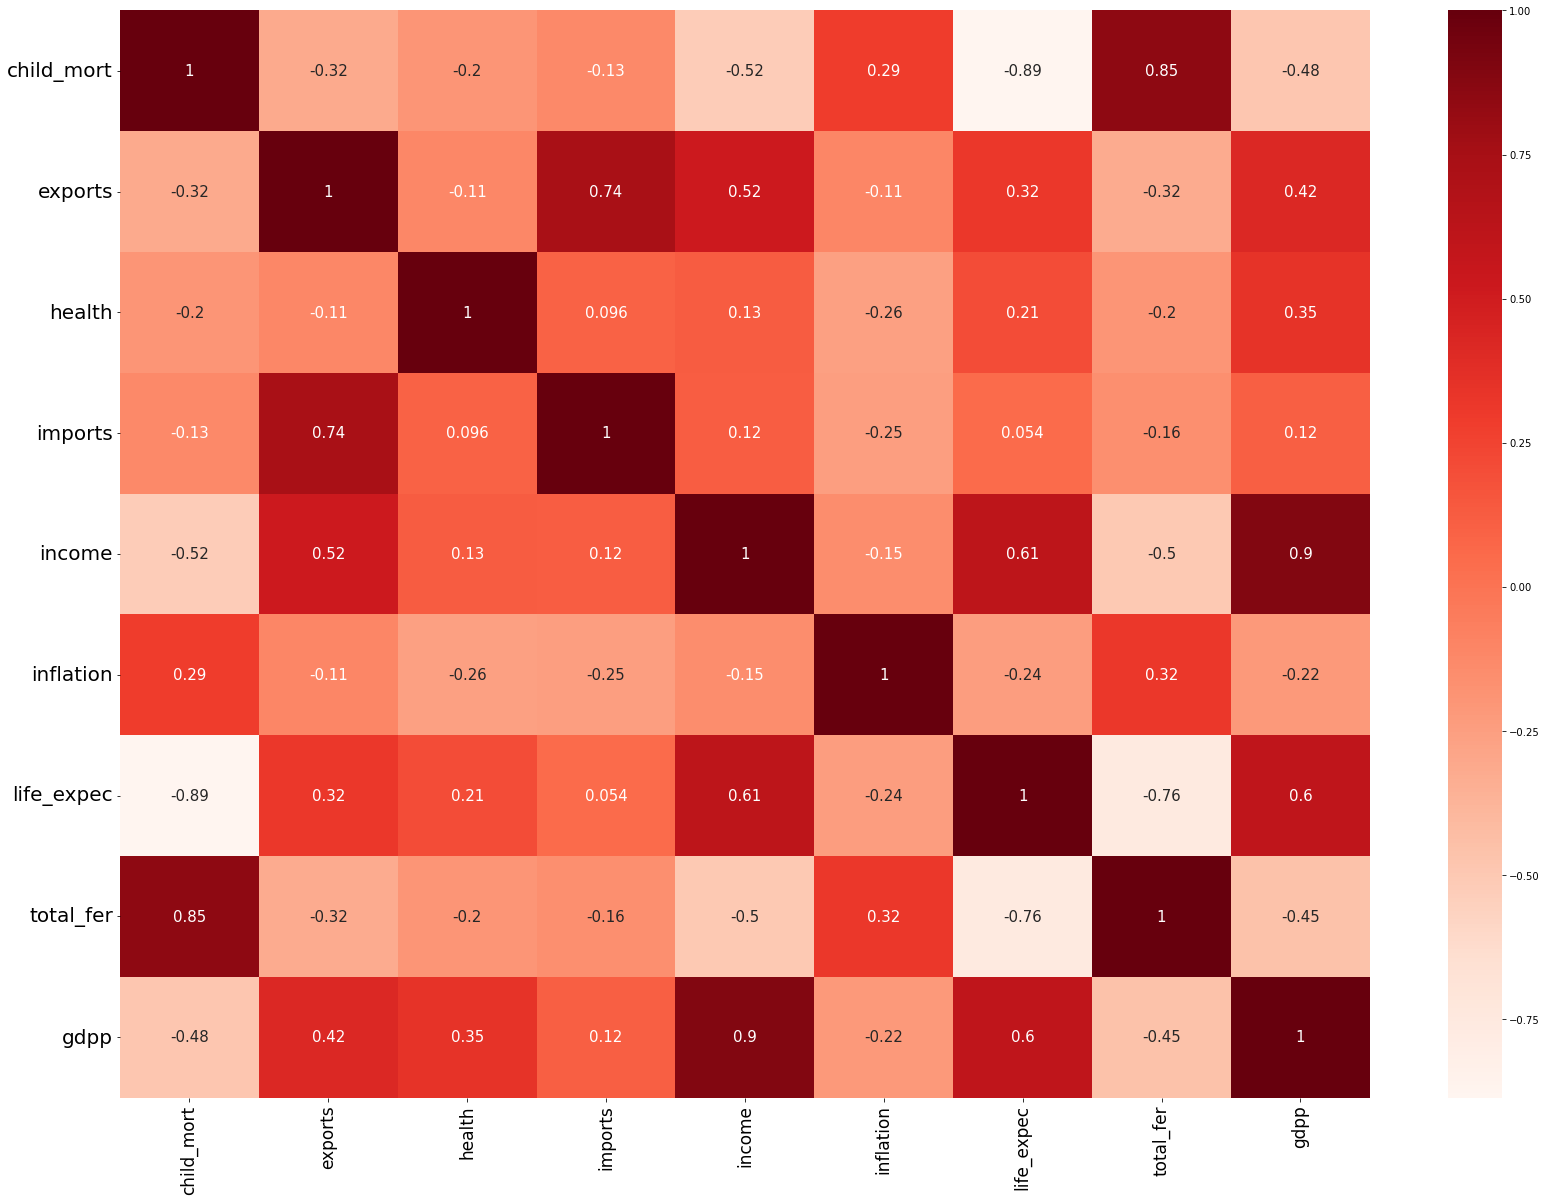

In [6]:
#corrolation table
plt.figure(figsize=(28,20))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds,annot_kws={"size": 15})
plt.yticks(rotation=0,fontsize=20)
plt.xticks(fontsize=17,rotation=90)
plt.show()

In [7]:
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


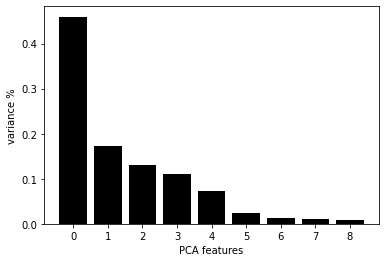

In [8]:
df_normal = StandardScaler().fit_transform(df)
# Create a PCA instance: pca
pca = PCA(n_components=9)
principalComponents = pca.fit_transform(df_normal)# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)
pca = PCA(n_components=9)
principalComponents = pca.fit_transform(df_normal)

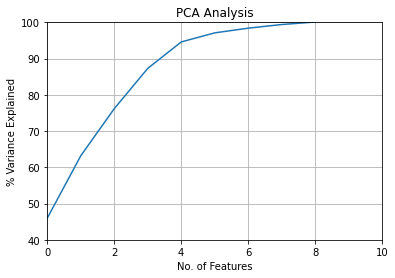

In [9]:
pca = PCA(n_components=9)
principalComponents = pca.fit_transform(df_normal)

#Calculate variance ratios
variance = pca.explained_variance_ratio_ 
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
plt.ylabel('% Variance Explained')
plt.xlabel('No. of Features')
plt.title('PCA Analysis')
plt.ylim(40,100)
plt.xlim(0,10)
plt.grid()
plt.plot(var)

almost 90% of variance is in 4 features

In [10]:
df_final=pd.DataFrame(df)

In [11]:
pca = PCA(n_components=4)
df_normal_pca = pca.fit_transform(df_normal)

In [12]:
k_mean={'init':'random','n_init':10,'max_iter':300,'random_state':0}

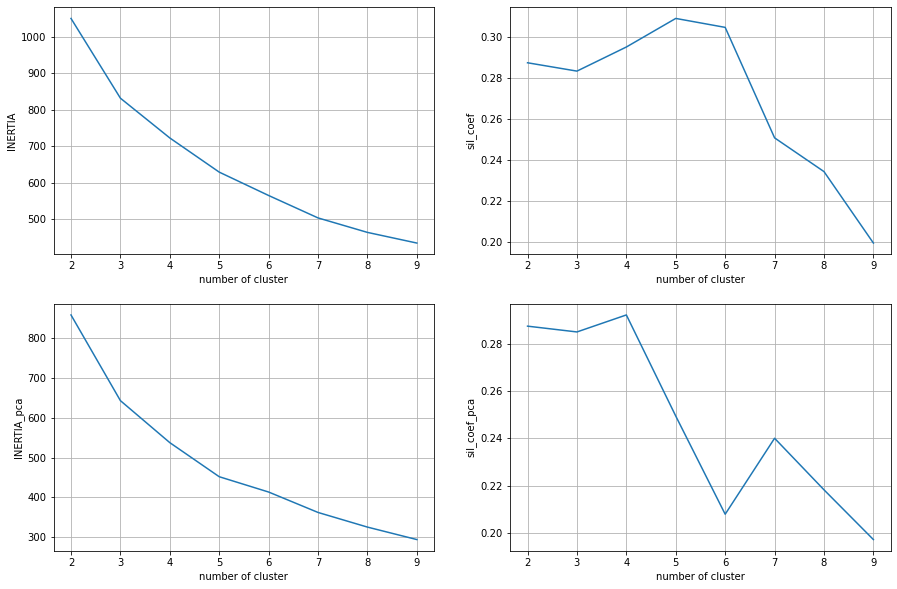

Best k with normal data is: 5
Best k with PCA data is: 5


In [13]:
#inertia with normal data
LIST=[]
for k  in range (2,10):
    k_means=KMeans(n_clusters=k, **k_mean)
    k_means.fit(df_normal)
    LIST.append(k_means.inertia_)
    
#silloute with normal data
sil_coef=[]
for k  in range (2,10):
    k_means=KMeans(n_clusters=k, **k_mean)
    k_means.fit(df_normal)
    score=silhouette_score(df_normal,k_means.labels_)
    sil_coef.append(score)
    
#inertia with pca data
LIST_pca=[]
for k  in range (2,10):
    k_means=KMeans(n_clusters=k, **k_mean)
    k_means.fit(df_normal_pca)
    LIST_pca.append(k_means.inertia_)
    
#silloute with pca data  
sil_coef_pca=[]
for k  in range (2,10):
    k_means=KMeans(n_clusters=k, **k_mean)
    k_means.fit(df_normal_pca)
    score=silhouette_score(df_normal,k_means.labels_)
    sil_coef_pca.append(score)

      
fig,((ax0,ax1),(ax2,ax3))=plt.subplots(2,2,figsize=(15,10))
ax0.plot(range(2,10),LIST)
ax0.set_xticks(range(2,10))
ax0.set_xlabel('number of cluster')
ax0.set_ylabel('INERTIA')
ax0.grid()


ax1.plot(range(2,10),sil_coef)
ax1.set_xticks(range(2,10))
ax1.set_xlabel('number of cluster')
ax1.set_ylabel('sil_coef')
ax1.grid()
    
    
ax2.plot(range(2,10),LIST_pca)
ax2.set_xticks(range(2,10))
ax2.set_xlabel('number of cluster')
ax2.set_ylabel('INERTIA_pca')
ax2.grid()
    
    
ax3.plot(range(2,10),sil_coef_pca)
ax3.set_xticks(range(2,10))
ax3.set_xlabel('number of cluster')
ax3.set_ylabel('sil_coef_pca')
ax3.grid()
 
plt.show() 
k_best_normal=KneeLocator(range(2,10),LIST,curve='convex',direction='decreasing')
k_best_PCA=KneeLocator(range(2,10),LIST_pca,curve='convex',direction='decreasing')

print('Best k with normal data is:',k_best_normal.elbow)
print('Best k with PCA data is:',k_best_PCA.elbow)

In [14]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df[['exports', 'income']])
distances, indices = nbrs.kneighbors(df[['exports', 'income']])

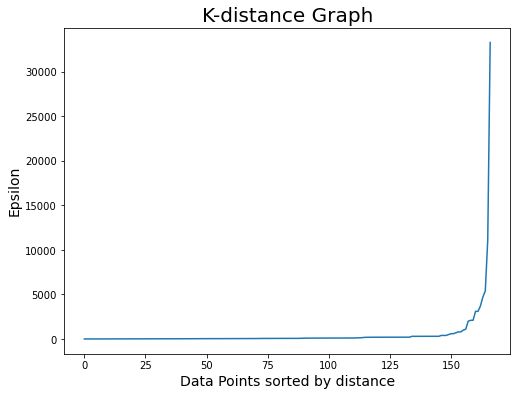

In [15]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(8,6))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [16]:
df_final=pd.DataFrame(df)
df_final

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


i used above code for testing dbscan on this data.but unfortunately this algorithm cant work with this data

from here,i will test diffrent algorithms on this data to find the best one.

[[ 0.24738967 -0.12709496  0.0332802  -0.75189666]
 [ 5.46022462  5.43247334  0.21164795  0.90605761]
 [ 2.58590537 -0.86669     0.07506731  0.98256433]
 [-2.40069473  0.42986347 -0.11977208  0.67641687]]


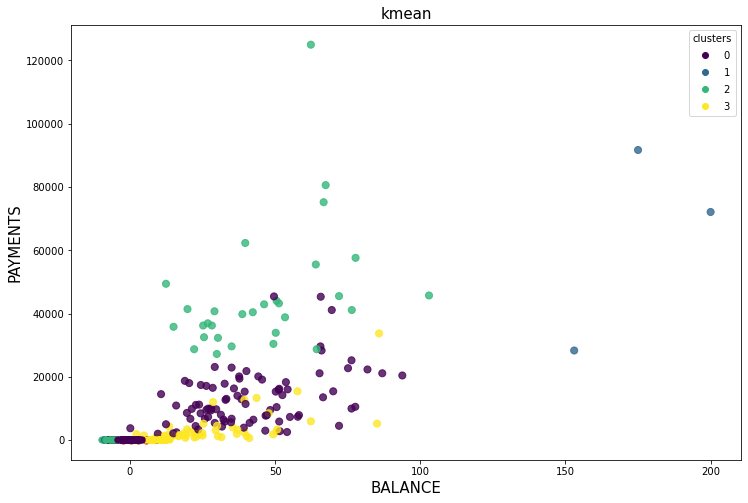

In [17]:
plt.figure(figsize=(12,8))
kmean = KMeans(n_clusters=4,random_state=0)
df_final['cluster'] = kmean.fit_predict(df_normal_pca)
centeroids=kmean.cluster_centers_
cen_x = [i[0] for i in centeroids] 
cen_y = [i[1] for i in centeroids]
## add to df_final
df_final['cen_x'] = df_final.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
df_final['cen_y'] = df_final.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})# define and map colors
print(centeroids)

plt.scatter(df_final['exports'],df_final['income'],c=kmean.labels_.astype('float'),s=50,alpha=0.8)
plt.scatter(cen_x, cen_y,c='red',s=50)
plt.title('kmean',fontsize=15)
plt.xlabel('BALANCE',fontsize=15)
plt.ylabel('PAYMENTS',fontsize=15)
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
X_tsne = tsne.fit_transform(df_normal_pca)

sc = plt.scatter(X_tsne[:,0], X_tsne[:,1], c=kmean.labels_.astype('float'))
plt.legend(*sc.legend_elements(), title='clusters')

plt.show()

In [18]:
df_final['cluster'].value_counts()

0    86
3    48
2    30
1     3
Name: cluster, dtype: int64

In [19]:
df_final.drop(['cluster','cen_x','cen_y'],axis=1,inplace=True)

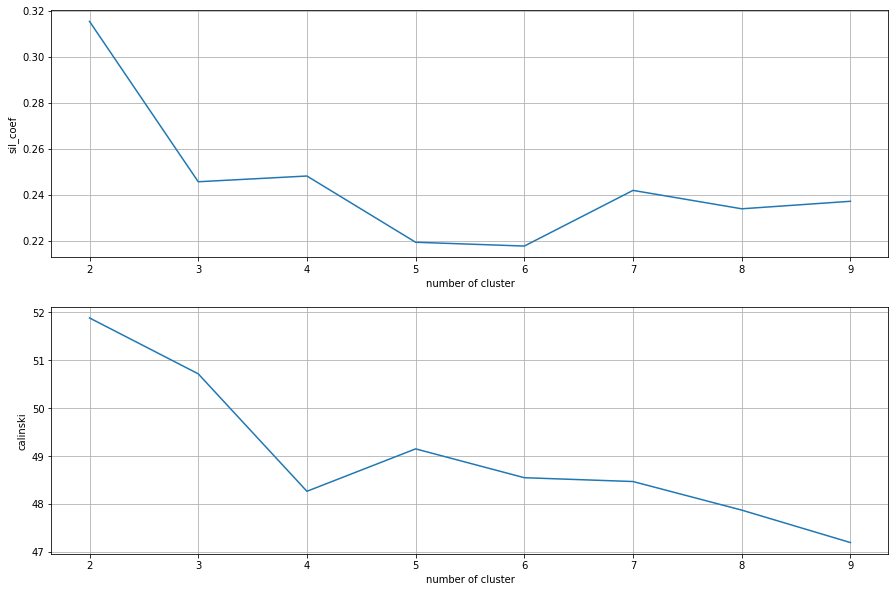

In [20]:
#Agglomerative Alghorithm
affinity_calinski=[]
for k  in range (2,10):
    k_affinity = AgglomerativeClustering(n_clusters=k).fit(df_normal)
    score=calinski_harabasz_score(df_normal,k_affinity.labels_)
    affinity_calinski.append(score)
    
#Agglomerative Alghorithm
sil_coef_affinity=[]
for k  in range (2,10):
    k_affinity = AgglomerativeClustering(n_clusters=k).fit(df_normal)
    score=silhouette_score(df_normal,k_affinity.labels_)
    sil_coef_affinity.append(score)
    
fig,(ax0,ax1)=plt.subplots(2,1,figsize=(15,10))    
ax0.plot(range(2,10),sil_coef_affinity)
ax0.set_xticks(range(2,10))
ax0.set_xlabel('number of cluster')
ax0.set_ylabel('sil_coef')  
ax0.grid()
    
ax1.plot(range(2,10),affinity_calinski)
ax1.set_xticks(range(2,10))
ax1.set_xlabel('number of cluster')
ax1.set_ylabel('calinski')
ax1.grid()
plt.show()

metrics show that this algorithm is not good for this data

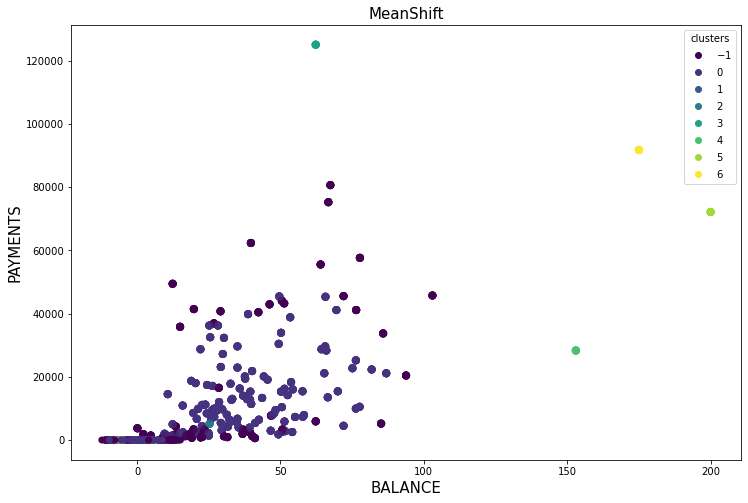

 0    108
-1     53
 1      1
 6      1
 4      1
 2      1
 3      1
 5      1
Name: meanshift, dtype: int64

In [21]:
plt.figure(figsize=(12,8))
model_mean = MeanShift(cluster_all=False,)
# fit model and predict clusters
yhat = model_mean.fit_predict(df_normal)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    plt.scatter(df_final['exports'], df_final['income'], c=model_mean.labels_.astype('float'), alpha = 0.6, s=50)
# show the plot
plt.title('MeanShift',fontsize=15)
plt.xlabel('BALANCE',fontsize=15)
plt.ylabel('PAYMENTS',fontsize=15)
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
X_tsne = tsne.fit_transform(df_normal)

sc = plt.scatter(X_tsne[:,0], X_tsne[:,1], c=model_mean.labels_.astype('float'))
plt.legend(*sc.legend_elements(), title='clusters')
plt.show()
df_final['meanshift'] = model_mean.fit_predict(df_normal)
df_final['meanshift'].value_counts()

mean shift is not good either

In [22]:
df_final.drop('meanshift',axis=1,inplace=True)

So i choose Kmean for this data.

In [23]:
df_final['cluster'] = kmean.fit_predict(df_normal_pca)

In [24]:
df_final['cluster'].value_counts()

0    86
3    48
2    30
1     3
Name: cluster, dtype: int64

MEDIUM ECONOMY 

In [25]:
df_final[df_final['cluster']==0].describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.0
mean,21.311628,41.197547,6.208953,47.653092,13098.720930,7.420477,73.066279,2.263837,6984.558140,0.0
std,13.883239,19.618186,2.156677,19.874583,8838.516883,7.853685,3.776697,0.667272,5451.440398,0.0
min,3.400000,0.109000,1.970000,0.065900,1990.000000,-4.210000,63.000000,1.250000,592.000000,0.0
25%,10.900000,26.900000,4.872500,32.550000,6715.000000,2.315000,70.400000,1.697500,2975.000000,0.0
50%,17.750000,37.650000,5.930000,48.950000,10700.000000,5.720000,73.850000,2.185000,5050.000000,0.0
75%,27.100000,52.275000,7.427500,60.675000,17700.000000,9.952500,76.100000,2.647500,10600.000000,0.0
max,64.400000,93.800000,14.200000,108.000000,45400.000000,45.900000,80.400000,4.340000,28000.000000,0.0


RICH ECONOMY

In [26]:
df_final[df_final['cluster']==1].describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.0
mean,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667,1.0
std,2.309401,23.515952,2.492877,16.165808,32460.642836,2.179718,1.205543,0.240624,43011.665084,0.0
min,2.800000,153.000000,3.960000,142.000000,28300.000000,-0.046000,80.300000,1.150000,21100.000000,1.0
25%,2.800000,164.000000,5.865000,148.000000,50200.000000,1.787000,80.800000,1.255000,33850.000000,1.0
50%,2.800000,175.000000,7.770000,154.000000,72100.000000,3.620000,81.300000,1.360000,46600.000000,1.0
75%,4.800000,187.500000,8.210000,164.000000,81900.000000,3.725000,82.000000,1.495000,75800.000000,1.0
max,6.800000,200.000000,8.650000,174.000000,91700.000000,3.830000,82.700000,1.630000,105000.000000,1.0


VERY RICH ECONOMY

In [27]:
df_final[df_final['cluster']==2].describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
count,30.000000,30.000000,30.000000,30.000000,30.0000,30.000000,30.000000,30.000000,30.000000,30.0
mean,4.953333,45.826667,9.168667,39.736667,45250.0000,2.742200,80.376667,1.795333,43333.333333,2.0
std,2.159140,21.736255,3.266299,17.455134,19785.3089,4.266366,1.440231,0.369293,15040.114942,0.0
min,2.600000,12.400000,1.810000,13.600000,27200.0000,-3.220000,76.500000,1.230000,22100.000000,2.0
25%,3.825000,28.425000,8.785000,28.025000,34375.0000,0.650500,79.825000,1.465000,34025.000000,2.0
50%,4.200000,44.250000,9.535000,35.000000,40550.0000,1.190000,80.400000,1.865000,41850.000000,2.0
75%,5.100000,63.575000,11.000000,47.400000,45650.0000,3.205000,81.400000,1.972500,48625.000000,2.0
max,10.800000,103.000000,17.900000,86.500000,125000.0000,16.700000,82.800000,3.030000,87800.000000,2.0


WEAK ECONOMY

In [28]:
df_final[df_final['cluster']==3].describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.0
mean,91.610417,29.571042,6.433542,43.133333,3897.354167,11.911146,59.239583,4.992083,1909.208333,3.0
std,34.319855,18.200215,2.651959,18.418658,5590.168621,15.362485,6.384914,1.036192,2925.911009,0.0
min,28.100000,2.200000,2.200000,17.200000,609.000000,0.885000,32.100000,2.590000,231.000000,3.0
25%,63.675000,17.025000,4.525000,29.900000,1390.000000,4.080000,56.725000,4.475000,551.500000,3.0
50%,89.750000,24.350000,5.675000,41.500000,1860.000000,8.855000,59.800000,5.055000,932.000000,3.0
75%,111.000000,39.400000,8.327500,50.025000,3522.500000,16.600000,62.825000,5.597500,1465.000000,3.0
max,208.000000,85.800000,13.100000,101.000000,33700.000000,104.000000,71.100000,7.490000,17100.000000,3.0


as you can see cluster number 3 is show us the names of poor economy countries according to mean of their features

In [29]:
answer=pd.DataFrame(df_final)
answer.insert(0,'country',data['country'])
poor_country=answer[answer['cluster']==3]
poor_country.reset_index(inplace=True,drop=True)
poor_country

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,3
1,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,3
2,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,3
3,Botswana,52.5,43.60,8.30,51.3,13300,8.920,57.1,2.88,6350,3
4,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,3
5,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,3
6,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,3
7,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,3
8,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,3
9,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,3


According to the annual income assessment criteria of countries, countries with incomes less than 1036 are in a very unfavorable situation and are the main candidates for receiving auxiliary budget.

In [30]:
poor_country[poor_country['income']<1036]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
5,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,3
7,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446,3
10,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,3
26,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,3
28,Malawi,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459,3
31,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419,3
33,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,3


LETS SHOW THEM ALL IN WORLD MAP!

In [31]:
#extract very_rich countries codes
very_rich_country=df_final[df_final['cluster']==2]
input_countries = list(very_rich_country['country'])
countries = {}
for Country in pc.countries:
    countries[Country.name] = Country.alpha_2
codes_very_rich = [countries.get(Country, 'Unknown code') for Country in input_countries]

#extract rich countries codes
rich_country=df_final[df_final['cluster']==1]
input_countries = list(rich_country['country'])
countries = {}
for Country in pc.countries:
    countries[Country.name] = Country.alpha_2
codes_rich = [countries.get(Country, 'Unknown code') for Country in input_countries]

#extract medium countrie codes
medium_country=df_final[df_final['cluster']==0]
input_countries = list(medium_country['country'])
countries = {}
for Country in pc.countries:
    countries[Country.name] = Country.alpha_2
medium_codes = [countries.get(Country, 'Unknown code') for Country in input_countries]

#extract poor countrie codes
input_countries = list(poor_country['country'])
countries = {}
for Country in pc.countries:
    countries[Country.name] = Country.alpha_2
codes = [countries.get(Country, 'Unknown code') for Country in input_countries]

In [32]:
poor_country.insert(1,'codes',codes)

Note: To run this code, you must have access to the Internet

In [33]:
#extract latitude and lontitude for poor and very poor countries.
from geopy.exc import GeocoderTimedOut
from geopy.geocoders import Nominatim
#for poor and very_poor countries
longitude = []
latitude = []
 
def findGeocode(codes):  
    try:
        geolocator = Nominatim(user_agent="your_app_name")  
        return geolocator.geocode(codes)      
    except GeocoderTimedOut:          
        return findGeocode(codes)    
  
for i in (poor_country['country']):      
    if findGeocode(i) != None:           
        loc = findGeocode(i)
        latitude.append(loc.latitude)
        longitude.append(loc.longitude)
    else:
        latitude.append(np.nan)
        longitude.append(np.nan)
poor_country["Longitude"] = longitude
poor_country["Latitude"] = latitude

#for medium countries
longitude_medium = []
latitude_medium = []
 
def findGeocode(medium_codes):  
    try:
        geolocator = Nominatim(user_agent="your_app_name")  
        return geolocator.geocode(medium_codes)      
    except GeocoderTimedOut:          
        return findGeocode(medium_codes)    
  
for i in (medium_country['country']):      
    if findGeocode(i) != None:           
        loc = findGeocode(i)
        latitude_medium.append(loc.latitude)
        longitude_medium.append(loc.longitude)
    else:
        latitude_medium.append(np.nan)
        longitude_medium.append(np.nan)
medium_country["Longitude"] = longitude_medium
medium_country["Latitude"] = latitude_medium


#for very_rich
longitude_very_rich = []
latitude_very_rich = []
 
def findGeocode(codes_very_rich):  
    try:
        geolocator = Nominatim(user_agent="your_app_name")  
        return geolocator.geocode(codes_very_rich)      
    except GeocoderTimedOut:          
        return findGeocode(codes_very_rich)    
  
for i in (very_rich_country['country']):      
    if findGeocode(i) != None:           
        loc = findGeocode(i)
        latitude_very_rich.append(loc.latitude)
        longitude_very_rich.append(loc.longitude)
    else:
        latitude_very_rich.append(np.nan)
        longitude_very_rich.append(np.nan)
very_rich_country["Longitude"] = longitude_very_rich
very_rich_country["Latitude"] = latitude_very_rich



#for rich
longitude_rich = []
latitude_rich = []
 
def findGeocode(codes_rich):  
    try:
        geolocator = Nominatim(user_agent="your_app_name")  
        return geolocator.geocode(codes_rich)      
    except GeocoderTimedOut:          
        return findGeocode(codes_rich)    
  
for i in (rich_country['country']):      
    if findGeocode(i) != None:           
        loc = findGeocode(i)
        latitude_rich.append(loc.latitude)
        longitude_rich.append(loc.longitude)
    else:
        latitude_rich.append(np.nan)
        longitude_rich.append(np.nan)
rich_country["Longitude"] = longitude_rich
rich_country["Latitude"] = latitude_rich


In [34]:
medium_country.dropna(inplace=True)
medium_country.reset_index(drop=True,inplace=True)
rich_country.dropna(inplace=True)
rich_country.reset_index(drop=True,inplace=True)
very_rich_country.dropna(inplace=True)
very_rich_country.reset_index(drop=True,inplace=True)
poor_country.dropna(inplace=True)
poor_country.reset_index(drop=True,inplace=True)
poor_country

,country,codes,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,Longitude,Latitude
0,Afghanistan,AF,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,3,66.238514,33.768006
1,Angola,AO,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,3,17.569124,-11.877577
2,Benin,BJ,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,3,2.258441,9.529347
3,Botswana,BW,52.5,43.60,8.30,51.3,13300,8.920,57.1,2.88,6350,3,24.592874,-23.168178
4,Burkina Faso,BF,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,3,-1.688031,12.075308
5,Burundi,BI,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,3,29.932452,-3.426449
6,Cameroon,CM,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,3,13.153581,4.612552
7,Central African Republic,CF,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,3,19.998123,7.032360
8,Chad,TD,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,3,19.015617,15.613414
9,Comoros,KM,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,3,44.283296,-12.204518


In [35]:
very_poor_country=poor_country[poor_country['income']<1036]
very_poor_country

,country,codes,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,Longitude,Latitude
5,Burundi,BI,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,3,29.932452,-3.426449
7,Central African Republic,CF,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446,3,19.998123,7.032360
24,Liberia,LR,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,3,-9.365852,5.749972
26,Malawi,MW,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459,3,33.930196,-13.268720
29,Mozambique,MZ,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419,3,34.914498,-19.302233
31,Niger,NE,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,3,9.323843,17.735621


In [36]:
import os
import conda
#for evade errors and import basemap
conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap

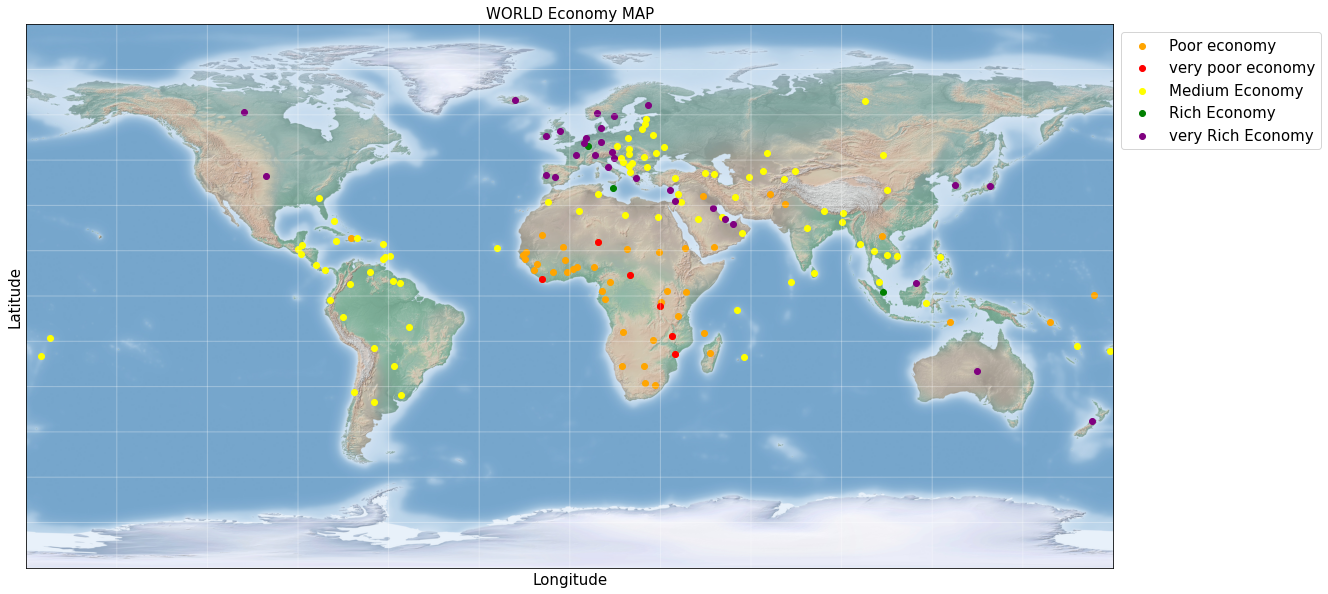

In [37]:
from itertools import chain

def draw_map(m, scale=0.2):
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)
    
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)   
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

plt.figure(figsize=(20, 10), edgecolor='w')
m=Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180)
draw_map(m)
label=['Poor economy','very poor economy','Medium Economy','Rich Economy','very Rich Economy']
#scatter for poor countrie(47 ta)
m.scatter(poor_country['Longitude'], poor_country['Latitude'],color='orange', latlon=True, alpha=1,label=label[0])
#scatter for very_poor countries
m.scatter(very_poor_country['Longitude'], very_poor_country['Latitude'],color='red', latlon=True, alpha=1,label=label[1])
#scatter for medium countries
m.scatter(medium_country['Longitude'], medium_country['Latitude'],color='yellow', latlon=True, alpha=1,label=label[2])
#scatter for  rich countries
m.scatter(rich_country['Longitude'], rich_country['Latitude'],color='green', latlon=True, alpha=1,label=label[3])
#scatter for very rich countries
m.scatter(very_rich_country['Longitude'], very_rich_country['Latitude'],color='purple', latlon=True, alpha=1,label=label[4])
plt.title('WORLD Economy MAP',fontsize=15)
plt.xlabel('Longitude',fontsize=15)
plt.ylabel('Latitude',fontsize=15)
plt.legend(bbox_to_anchor=(1,1) ,fontsize=15)

In [38]:
#god bless:)